In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## T2 PvL

In [89]:
data = pd.read_csv('merge_denovo_BAlim_t2pvl.csv',sep=',', index_col = 0)
#data = data.T
data

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291,Week,Category
SampleID,,,,,,,,,,,,,,,,,,,,,
570.T2,0,43335,0,0,0,0,0,19372,0,0,...,0,13,0,6,0,0,0,57,2,Placebo
571.T2,0,47148,0,0,0,0,0,0,0,0,...,1,0,0,5,0,0,0,12,2,Placebo
572.T2,0,0,0,10539,0,0,0,25594,0,0,...,0,4,0,24,3,1,0,2,2,Placebo
573.T2,0,0,0,0,0,0,0,145888,0,4101,...,1,15,0,55,3,1,0,1,2,Placebo
574.T2,0,7217,0,0,0,0,0,10382,0,0,...,5,0,0,18,0,1,0,65,2,Placebo
575.T2,5456,0,0,0,0,0,0,54213,10630,0,...,1,3,0,33,0,0,0,53,2,Placebo
576.T2,0,0,0,0,0,0,0,0,0,0,...,0,337,0,52,3,1,1,6,2,Placebo
577.T2,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,0,3,2,Placebo
578.T2,0,0,0,0,0,0,0,22266,0,0,...,2,0,0,78,0,0,1,16,2,Letrozole


In [90]:
data.iloc[:,0:190]

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,denovo443468,denovo474098,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291
SampleID,,,,,,,,,,,,,,,,,,,,,
570.T2,0,43335,0,0,0,0,0,19372,0,0,...,1,3,0,13,0,6,0,0,0,57
571.T2,0,47148,0,0,0,0,0,0,0,0,...,1,9,1,0,0,5,0,0,0,12
572.T2,0,0,0,10539,0,0,0,25594,0,0,...,5,0,0,4,0,24,3,1,0,2
573.T2,0,0,0,0,0,0,0,145888,0,4101,...,0,0,1,15,0,55,3,1,0,1
574.T2,0,7217,0,0,0,0,0,10382,0,0,...,0,58,5,0,0,18,0,1,0,65
575.T2,5456,0,0,0,0,0,0,54213,10630,0,...,0,62,1,3,0,33,0,0,0,53
576.T2,0,0,0,0,0,0,0,0,0,0,...,0,2,0,337,0,52,3,1,1,6
577.T2,0,0,0,0,0,0,0,0,0,0,...,0,2,0,3,0,2,0,0,0,3
578.T2,0,0,0,0,0,0,0,22266,0,0,...,1,11,2,0,0,78,0,0,1,16


In [91]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,191]
x = data.iloc[:,0:190]

In [92]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

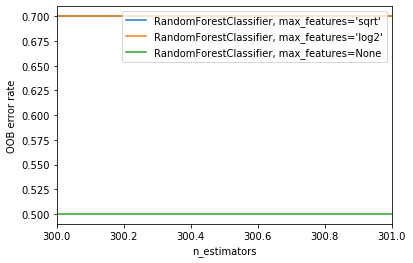

In [93]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 300
max_estimators = 301

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [94]:
clf = RandomForestClassifier(n_estimators=300, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.6


In [95]:
clf_final = RandomForestClassifier(n_estimators=300, bootstrap=True,max_features=None,oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.5


In [96]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.6666666666666667

In [97]:
print(clf_final.oob_score_)

0.5


In [98]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

133    0.126667
90     0.120000
15     0.071111
187    0.070000
121    0.048968
65     0.034524
171    0.033333
175    0.033333
115    0.033254
161    0.032063
177    0.029921
123    0.026667
189    0.023333
163    0.022222
86     0.020000
112    0.018889
174    0.016667
181    0.016587
169    0.013333
166    0.013333
dtype: float64

In [99]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Lithocholic acid (NIST14),0.126667
3β-Hydroxy-5-cholenoic acid (NIST14),0.120000
β-Hyodeoxycholic acid.7,0.071111
denovo564490,0.070000
Deoxycholic acid (NIST14).1,0.048968
Chenodeoxycholic acid,0.034524
denovo344458,0.033333
denovo283443,0.033333
Cholic acid (NIST14).17,0.033254
denovo81639,0.032063


## T2 LvCoL

In [26]:
data = pd.read_csv('merge_denovo_BAlim_t2lvcol.csv',sep=',', index_col = 0)
#data = data.T
data

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291,Week,Category
SampleID,,,,,,,,,,,,,,,,,,,,,
578.T2,0,0,0,0,0,0,0,22266,0,0,...,2,0,0,78,0,0,1,16,2,Letrozole
580.T2,0,0,0,0,0,0,0,0,0,0,...,0,3,0,5,0,0,1,9,2,Letrozole
581.T2,3569,0,0,0,0,0,0,0,0,0,...,1,0,0,97,0,0,0,2,2,Letrozole
582.T2,0,0,0,0,0,0,0,76694,0,11171,...,1,4,1,82,0,0,0,14,2,Letrozole
583.T2,0,0,0,0,0,0,0,67035,0,0,...,7,5,1,21,0,0,2,13,2,Letrozole
584.T2,0,17388,0,0,0,0,0,0,0,0,...,0,1,1,434,0,0,0,31,2,Letrozole
585.T2,0,0,0,0,0,0,40110,40855,0,0,...,12,10,0,294,0,0,0,5,2,Letrozole
586.T2,0,0,0,0,0,0,0,16858,0,0,...,0,46,3,9,0,0,0,79,2,Letrozole
589.T2,0,0,0,0,0,25336,80104,0,0,0,...,0,0,0,10,0,0,1,16,2,Co-L


In [27]:
data.iloc[:,0:190]

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,denovo443468,denovo474098,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291
SampleID,,,,,,,,,,,,,,,,,,,,,
578.T2,0,0,0,0,0,0,0,22266,0,0,...,1,11,2,0,0,78,0,0,1,16
580.T2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,5,0,0,1,9
581.T2,3569,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,97,0,0,0,2
582.T2,0,0,0,0,0,0,0,76694,0,11171,...,1,4,1,4,1,82,0,0,0,14
583.T2,0,0,0,0,0,0,0,67035,0,0,...,7,1,7,5,1,21,0,0,2,13
584.T2,0,17388,0,0,0,0,0,0,0,0,...,3,29,0,1,1,434,0,0,0,31
585.T2,0,0,0,0,0,0,40110,40855,0,0,...,22,50,12,10,0,294,0,0,0,5
586.T2,0,0,0,0,0,0,0,16858,0,0,...,0,1,0,46,3,9,0,0,0,79
589.T2,0,0,0,0,0,25336,80104,0,0,0,...,0,0,0,0,0,10,0,0,1,16


In [28]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,191]
x = data.iloc[:,0:190]

In [29]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

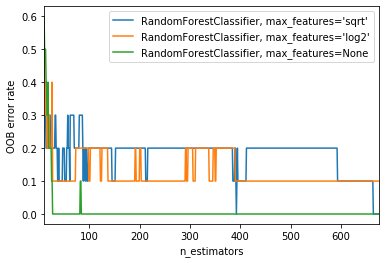

In [30]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [31]:
clf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.9


In [32]:
clf_final = RandomForestClassifier(n_estimators=250, bootstrap=True, max_depth=10, max_features=None,
                                   random_state= 42, min_samples_split=.7)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 1.0


In [33]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

In [34]:
print(oob_error)

0.0


In [35]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

117    0.125984
135    0.118110
133    0.110236
115    0.110236
116    0.102362
91     0.086614
140    0.055118
147    0.039370
112    0.031496
139    0.031496
103    0.031496
141    0.031496
7      0.023622
121    0.015748
78     0.015748
113    0.015748
160    0.015748
38     0.007874
134    0.007874
132    0.007874
dtype: float64

In [36]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Cholic acid (NIST14).19,0.125984
Tauroursodeoxycholic acid (NIST14).1,0.118110
Cholic acid (NIST14).17,0.110236
Lithocholic acid (NIST14),0.110236
Cholic acid (NIST14).18,0.102362
3β-Hydroxy-5-cholenoic acid (NIST14).1,0.086614
Taurocholic acid.2,0.055118
Ursocholic acid.3,0.039370
Cholic acid (NIST14).14,0.031496
Taurocholic acid.3,0.031496


## T5 LvCoL

In [37]:
data = pd.read_csv('merge_denovo_BAlim_t5lvcol.csv',sep=',', index_col = 0)
#data = data.T
data

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291,Week,Category
SampleID,,,,,,,,,,,,,,,,,,,,,
578.T5,4451,182669,0,0,0,0,0,3662,1254,0,...,22,0,5,118,1,0,105,25,5,Letrozole
580.T5,0,0,0,0,0,0,64559,10891,0,0,...,0,1,0,6,4,4,3,62,5,Letrozole
581.T5,0,0,0,0,0,0,0,25466,0,0,...,0,2,0,38,2,1,1,83,5,Letrozole
582.T5,7304,29807,0,0,0,0,0,11725,0,0,...,0,17,3,32,0,0,265,136,5,Letrozole
583.T5,0,0,0,0,0,0,0,0,0,0,...,0,1,9,14,0,0,2,130,5,Letrozole
584.T5,0,0,0,0,0,61532,0,131889,0,0,...,1,51,0,6,1,0,2,11,5,Letrozole
585.T5,0,0,0,0,0,0,0,0,11549,0,...,1,3,0,34,1,0,2,4,5,Letrozole
586.T5,0,0,0,0,0,0,0,0,0,0,...,0,31,13,48,2,0,0,238,5,Letrozole
589.T5,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,0,5,5,Co-L


In [38]:
data.iloc[:,191]

SampleID
578.T5    Letrozole
580.T5    Letrozole
581.T5    Letrozole
582.T5    Letrozole
583.T5    Letrozole
584.T5    Letrozole
585.T5    Letrozole
586.T5    Letrozole
589.T5         Co-L
591.T5         Co-L
593.T5         Co-L
595.T5         Co-L
597.T5         Co-L
599.T5         Co-L
Name: Category, dtype: object

In [39]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,191]
x = data.iloc[:,0:190]

In [40]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

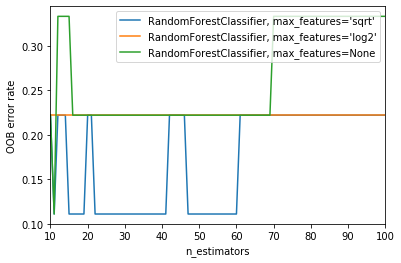

In [42]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [43]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

/home/basilin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean Validation Scores: 0.7333333333333333


In [67]:
clf_final = RandomForestClassifier(n_estimators=50, bootstrap=True, max_features='sqrt',
                                   random_state= 40)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.4


In [68]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.8333333333333334

In [69]:
print(oob_error)

0.33333333333333337


In [70]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

40     0.081633
50     0.073980
21     0.061224
125    0.053878
185    0.052296
133    0.044949
103    0.040816
165    0.040816
176    0.033469
154    0.031888
177    0.029155
162    0.028061
181    0.027755
91     0.023907
112    0.020408
119    0.020408
65     0.020408
130    0.020408
140    0.020408
143    0.020408
dtype: float64

In [71]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
β-Muricholic acid.11,0.081633
γ-Muricholic acid.6,0.073980
β-Hyodeoxycholic acid.13,0.061224
Deoxycholic acid (NIST14).5,0.053878
denovo560339,0.052296
Lithocholic acid (NIST14),0.044949
denovo167965,0.040816
Cholic acid (NIST14).5,0.040816
denovo353230,0.033469
Ursodeoxycholic acid.2,0.031888


## T5 PvL

In [72]:
data = pd.read_csv('merge_denovo_BAlim_t5pvl.csv',sep=',', index_col = 0)
#data = data.T
data

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291,Week,Category
SampleID,,,,,,,,,,,,,,,,,,,,,
570.T5,0,0,170150,0,0,0,0,0,0,0,...,0,1,2,42,0,0,0,131,5,Placebo
571.T5,0,0,0,0,0,0,0,0,0,0,...,106,1,2,85,0,0,1,109,5,Placebo
572.T5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,1,5,1,11,5,Placebo
573.T5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,15,0,4,1,77,5,Placebo
574.T5,0,0,0,0,0,0,0,0,0,0,...,96,5,2,65,1,1,1,99,5,Placebo
575.T5,0,31465,0,0,0,0,0,10307,0,0,...,126,2,6,31,1,0,0,61,5,Placebo
576.T5,0,0,0,0,0,0,0,0,0,0,...,1,608,0,3,31,1,0,2,5,Placebo
577.T5,0,0,0,0,0,0,0,11108,0,0,...,0,120,0,3,19,0,1,9,5,Placebo
578.T5,4451,182669,0,0,0,0,0,3662,1254,0,...,22,0,5,118,1,0,105,25,5,Letrozole


In [73]:
data.iloc[:,191]

SampleID
570.T5      Placebo
571.T5      Placebo
572.T5      Placebo
573.T5      Placebo
574.T5      Placebo
575.T5      Placebo
576.T5      Placebo
577.T5      Placebo
578.T5    Letrozole
580.T5    Letrozole
581.T5    Letrozole
582.T5    Letrozole
583.T5    Letrozole
584.T5    Letrozole
585.T5    Letrozole
586.T5    Letrozole
Name: Category, dtype: object

In [74]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,191]
x = data.iloc[:,0:190]

In [75]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

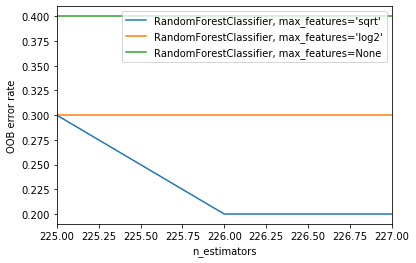

In [80]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 225
max_estimators = 227

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [81]:
clf = RandomForestClassifier(n_estimators=226, max_features='sqrt', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.6


In [85]:
clf_final = RandomForestClassifier(n_estimators=150, bootstrap=True, max_features='sqrt',oob_score=True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.5


In [86]:
print(clf_final.oob_score_)

0.7


In [87]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

166    0.102579
175    0.074048
122    0.044153
170    0.038836
86     0.037500
177    0.028421
162    0.027646
165    0.027063
185    0.024841
173    0.023093
15     0.022302
179    0.021587
184    0.019802
121    0.018048
156    0.018016
171    0.017857
164    0.017738
158    0.017302
159    0.016389
163    0.015463
dtype: float64

In [88]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
denovo175813,0.102579
denovo344458,0.074048
Deoxycholic acid (NIST14).2,0.044153
denovo278275,0.038836
12-Ketodeoxycholic acid (NIST14).2,0.037500
denovo356692,0.028421
denovo90825,0.027646
denovo167965,0.027063
denovo560339,0.024841
denovo291148,0.023093
